# Regresión lineal multivariable

## Importando datos

Importación de modelo y definición del nombre de las columnas

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

En vez de incorporar una sola variable en X, utiliza 2. 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

/home/adolfo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_6874/446080276.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


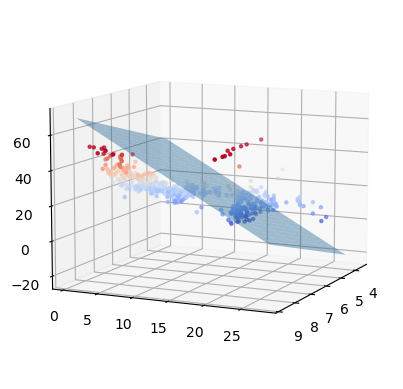

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np 
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM':X1.ravel(), 'INDUS':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4)

color_map = plt.cm.get_cmap('coolwarm')

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], c=df['MEDV'], cmap=color_map, marker='.')

ax.view_init(elev=10, azim=25)
plt.show()

## Generando predicción con el modelo

In [4]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(-1, 1))
price_std = slr.predict(num_rooms_std)
print('El precio en miles es de %.3f'%
      sc_y.inverse_transform(price_std))

ValueError: X has 1 features, but StandardScaler is expecting 2 features as input.